# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.104307e+01     8.542616e+00
 * time: 0.0021469593048095703
     1     2.933124e+01     4.856709e+00
 * time: 0.010293960571289062
     2     2.179249e+01     6.490332e+00
 * time: 0.018097877502441406
     3     1.708213e+01     5.905016e+00
 * time: 0.026648998260498047
     4     1.165479e+01     2.350871e+00
 * time: 0.0343780517578125
     5     9.865754e+00     1.045099e+00
 * time: 0.04319286346435547
     6     9.151250e+00     1.605462e+00
 * time: 0.04944205284118652
     7     8.774424e+00     8.548121e-01
 * time: 0.05572795867919922
     8     8.525064e+00     7.773006e-01
 * time: 0.06185603141784668
     9     8.366677e+00     6.725732e-01
 * time: 0.0688939094543457
    10     8.257865e+00     6.606560e-01
 * time: 0.07519388198852539
    11     8.182505e+00     4.579922e-01
 * time: 0.08221101760864258
    12     8.149888e+00     9.418462e-01
 * time: 0.08783888816833496
    13     8.113276e+00     6.003390e-01
 * ti

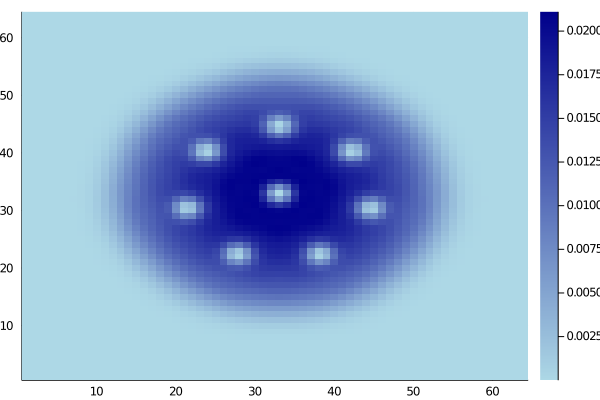

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)